# Modeling 

- Further problems -> Thresholding?
- Evalution of normel behaviour



### Idea
Feed with dostributions to detect anomal behaviour, What is normal behaviour - from a statistical ppoint of view 
adapating the threshold, if a certain threshold is reached the data doesn't follow normal distribution

In [44]:
#Imports
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../')
from ingest.transform import Tranformer

In [28]:
# Load in data 
train = pd.read_pickle("/Users/janavihs/projects/anomaly-detection-software/data/interim/train.pkl")
test = pd.read_pickle("/Users/janavihs/projects/anomaly-detection-software/data/interim/test.pkl")
train = train.set_index('timestamp')
test = test.set_index('timestamp')

In [30]:
# Scale data - Use Standard Scaling at first 
transformer = Tranformer()
# Standard Scaling
columns = train.columns.tolist()
train[columns]= transformer.standard(train[columns])
test[columns] = transformer.standard(test[columns])

## Isolation Forest
- uses tree-based approach to isolate anomalies after modelling itself on "normal" data in an unsupervised fashion.
https://www.projectpro.io/article/anomaly-detection-using-machine-learning-in-python-with-example/555#mcetoc_1fqgmt45ri


In [31]:
from sklearn.ensemble import IsolationForest

In [32]:
train.head(5)

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written
timestamp,,,,,,
2021-09-09 23:21:47.309,-0.274662,-2.097193,1.078260,0.068812,-0.015766,-0.139583
2021-09-09 23:21:48.319,-0.164245,-1.855743,0.335702,-0.170922,-0.015766,-0.139583
2021-09-09 23:21:49.336,-0.186559,-1.621365,-0.396220,-0.180346,-0.015766,-0.139583
2021-09-09 23:21:50.345,0.044296,-1.191281,0.099235,-0.093361,-0.015766,-0.139583
2021-09-09 23:21:51.364,1.881807,-0.383458,1.583098,0.681183,-0.015766,-0.139583


In [43]:
test.head(5)
test[test['scores']<0]

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written,scores,anomaly
timestamp,,,,,,,,
2021-12-21 16:29:19.790,-1.257017,-2.470057,-0.933793,-0.554823,-0.021601,-0.019154,-0.059030,-1
2021-12-21 16:29:20.795,-1.259040,-2.470057,-1.063122,-0.554823,-0.021601,-0.019154,-0.052712,-1
2021-12-21 16:29:22.808,-1.065546,-2.093528,-1.120889,-0.554823,-0.021601,-0.019154,-0.016017,-1
2021-12-21 16:29:23.815,-0.733771,-1.868811,-1.184403,-0.554823,-0.021601,-0.019154,-0.021243,-1
2021-12-21 16:29:25.830,-0.626558,-1.423067,-1.184403,-0.554823,-0.021601,-0.019154,-0.002068,-1
...,...,...,...,...,...,...,...,...
2021-09-10 02:04:31.236,0.363768,-0.409299,0.380766,2.638829,-0.021601,-0.019154,-0.019133,-1
2021-09-09 18:16:59.541,0.269370,-1.982323,2.338233,0.498024,-0.021601,-0.019154,-0.039047,-1
2021-09-09 18:17:03.591,2.111985,-0.358080,1.799649,1.168340,-0.021601,-0.019154,-0.031345,-1


In [34]:
# Load and fit model
model = IsolationForest(random_state=0).fit(train[columns])

In [35]:
train['scores'] = model.decision_function(train[columns])
train['anomaly']=model.predict(train[columns])
train.head()

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written,scores,anomaly
timestamp,,,,,,,,
2021-09-09 23:21:47.309,-0.274662,-2.097193,1.078260,0.068812,-0.015766,-0.139583,0.002307,1
2021-09-09 23:21:48.319,-0.164245,-1.855743,0.335702,-0.170922,-0.015766,-0.139583,0.058157,1
2021-09-09 23:21:49.336,-0.186559,-1.621365,-0.396220,-0.180346,-0.015766,-0.139583,0.084418,1
2021-09-09 23:21:50.345,0.044296,-1.191281,0.099235,-0.093361,-0.015766,-0.139583,0.095725,1
2021-09-09 23:21:51.364,1.881807,-0.383458,1.583098,0.681183,-0.015766,-0.139583,-0.000673,-1


In [40]:
train['scores']

timestamp
2021-09-09 23:21:47.309    0.002307
2021-09-09 23:21:48.319    0.058157
2021-09-09 23:21:49.336    0.084418
2021-09-09 23:21:50.345    0.095725
2021-09-09 23:21:51.364   -0.000673
                             ...   
2021-09-15 12:32:18.755    0.022366
2021-09-15 12:32:19.758    0.022689
2021-09-15 12:32:20.762    0.022076
2021-09-15 12:32:21.766   -0.001121
2021-09-15 12:32:22.769    0.006890
Name: scores, Length: 9564, dtype: float64

In [36]:
anomaly=train.loc[train['anomaly']==-1] #well should be zero as it should only contain normal behaviour 
anomaly

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written,scores,anomaly
timestamp,,,,,,,,
2021-09-09 23:21:51.364,1.881807,-0.383458,1.583098,0.681183,-0.015766,-0.139583,-0.000673,-1
2021-09-09 23:21:52.380,2.683864,0.855393,1.779529,0.473024,-0.015766,-0.139583,-0.019636,-1
2021-09-09 23:21:55.407,0.110711,1.289251,0.878076,0.267960,-0.015766,3.558402,-0.076214,-1
2021-09-09 23:22:31.810,-1.300482,0.475297,-1.277655,-0.567153,-0.015766,-0.139583,-0.035065,-1
2021-09-10 02:18:48.693,0.940780,-1.918463,3.425416,0.711898,-0.015766,-0.139583,-0.082618,-1
...,...,...,...,...,...,...,...,...
2021-09-15 12:28:31.185,-1.308555,-2.303747,-1.255760,-0.567153,-0.015766,-0.139583,-0.006625,-1
2021-09-15 12:31:39.622,-1.308571,-2.296202,-1.255760,-0.567153,-0.015766,-0.139583,-0.009765,-1
2021-09-15 12:31:47.651,-1.308162,-2.296202,-1.255760,-0.567153,-0.015766,-0.139583,-0.011551,-1


In [37]:
test['scores'] = model.decision_function(test[columns])
test['anomaly']=model.predict(test[columns])
test.head()

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written,scores,anomaly
timestamp,,,,,,,,
2021-12-21 16:29:19.790,-1.257017,-2.470057,-0.933793,-0.554823,-0.021601,-0.019154,-0.059030,-1
2021-12-21 16:29:20.795,-1.259040,-2.470057,-1.063122,-0.554823,-0.021601,-0.019154,-0.052712,-1
2021-12-21 16:29:21.802,-0.171926,-2.207964,0.158032,-0.081749,-0.021601,-0.019154,0.048297,1
2021-12-21 16:29:22.808,-1.065546,-2.093528,-1.120889,-0.554823,-0.021601,-0.019154,-0.016017,-1
2021-12-21 16:29:23.815,-0.733771,-1.868811,-1.184403,-0.554823,-0.021601,-0.019154,-0.021243,-1


In [38]:
anomaly=test.loc[test['anomaly']==-1] # based on cpu_usage
anomaly

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written,scores,anomaly
timestamp,,,,,,,,
2021-12-21 16:29:19.790,-1.257017,-2.470057,-0.933793,-0.554823,-0.021601,-0.019154,-0.059030,-1
2021-12-21 16:29:20.795,-1.259040,-2.470057,-1.063122,-0.554823,-0.021601,-0.019154,-0.052712,-1
2021-12-21 16:29:22.808,-1.065546,-2.093528,-1.120889,-0.554823,-0.021601,-0.019154,-0.016017,-1
2021-12-21 16:29:23.815,-0.733771,-1.868811,-1.184403,-0.554823,-0.021601,-0.019154,-0.021243,-1
2021-12-21 16:29:25.830,-0.626558,-1.423067,-1.184403,-0.554823,-0.021601,-0.019154,-0.002068,-1
...,...,...,...,...,...,...,...,...
2021-09-10 02:04:31.236,0.363768,-0.409299,0.380766,2.638829,-0.021601,-0.019154,-0.019133,-1
2021-09-09 18:16:59.541,0.269370,-1.982323,2.338233,0.498024,-0.021601,-0.019154,-0.039047,-1
2021-09-09 18:17:03.591,2.111985,-0.358080,1.799649,1.168340,-0.021601,-0.019154,-0.031345,-1


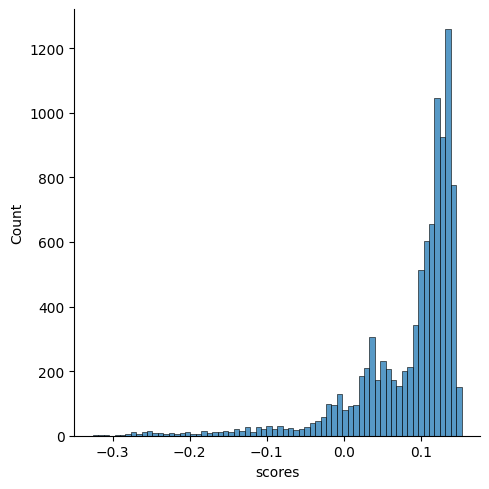

In [46]:
sns.displot(train['scores'])